In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
with open('./datasets/business_dataset_new_orleans.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df = pd.read_json(data_json_str)
    

C:\Users\maysa\AppData\Local\Temp\ipykernel_1572\2164657567.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data_json_str)


In [4]:
with open('./datasets/user_dataset_new_orleans.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df = pd.read_json(data_json_str)

print("Before removing friends: ", len(df['friends']))

# convert friends to list
df['friends'] = df['friends'].apply(lambda x: x.split(','))

# Converte os IDs de usuário do DataFrame em um conjunto
user_ids_set = set(df['user_id'])

# Define a função para remover amigos não existentes usando conjuntos
def remove_non_existing_friends(friends):
    return list(set(friends) & user_ids_set)

# Exibe o número de amigos antes de remover os não existentes
print("Before removing non-existing friends:", df['friends'].apply(len).sum())

# Aplica a função para remover amigos não existentes
df['friends'] = df['friends'].apply(remove_non_existing_friends)

# Exibe o número de amigos após remover os não existentes
print("After removing non-existing friends:", df['friends'].apply(len).sum())

print(df.head())

# remove users with no friends
df = df[df['friends'].apply(len) > 0]

# put it into a json
df.to_json('1_user_dataset_new_orleans.json', orient='records', lines=True)


C:\Users\maysa\AppData\Local\Temp\ipykernel_1572\165721060.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data_json_str)


Before removing friends:  245354
Before removing non-existing friends: 18945313
After removing non-existing friends: 14555
                  user_id    name  review_count        yelping_since  useful  \
0  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
1  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
2  E9kcWJdJUHuTKfQurPljwA    Mike           358  2008-12-11 22:11:56     399   
3  AUi8MPWJ0mLkMfwbui27lg    John           109  2010-01-07 18:32:04     154   
4  SgiBkhXeqIKl1PlFpZOycQ  Eugene           682  2006-08-25 16:47:25    1819   

   funny   cool                                              elite  \
0  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
1    330    299                                     2009,2010,2011   
2    102    143                                                      
3     20     23                                                      
4   1138   1297                           2007

In [5]:
#graph
graph = nx.Graph()

# create a graph with nodes being users, and node only becomes part of the graph if it has friends
for index, row in df.iterrows():
    if len(row['friends']) > 0:
        graph.add_node(row['user_id'])
    


In [ ]:
# create a graph with connection between users if they are friends with each other, edge from user to friend
for index, row in df.iterrows():
    for friend in row['friends']:
        graph.add_edges_from([(row['user_id'], friend)])
    
print("Number of nodes: ", graph.number_of_nodes())
print("Number of edges: ", graph.number_of_edges())

# Centrality of each node in a graph

The people most popular or more liked usually are the ones who have more friends. Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections.

In [20]:
degree_centralities = nx.degree_centrality(graph)

sorted_degree_centralities = sorted(degree_centralities.items(), key=lambda x: x[1], reverse=True)

for node, centrality in sorted_degree_centralities:
    print(f"User {node} has degree centrality: {centrality}")

User 5tXRxr4T24Awl7vjyCvIcQ has degree centrality: 0.006037144568874142
User OA-eps0MDNwnaThISWu-rw has degree centrality: 0.004654592377528919
User WKIW7tWyMq7_XN0V2ouo0A has degree centrality: 0.003871146135766625
User 2jCrH48LDG4c3ja4CLh0qg has degree centrality: 0.003825061062721784
User h8_Mzh_ndxFwxQgLZsRs9w has degree centrality: 0.003502465551407899
User GJv1yf_IhUZqpDjFr86DmA has degree centrality: 0.003410295405318217
User qpFCY_wj8_G-HOV8MxIaHw has degree centrality: 0.0029494446748698096
User 0G-QF457q_0Z_jKqh6xWiA has degree centrality: 0.0027651043826904466
User RT9abp-FMe21pBD8PPFtUg has degree centrality: 0.002488593944421402
User m6RU5Ov4C1uMQRr3J0Fvfg has degree centrality: 0.0021199133600626756
User 3zxy3LVBV3ttxoYbY4rQ8A has degree centrality: 0.0019355730678833126
User iLjMdZi0Tm7DQxX1C1_2dg has degree centrality: 0.0017973178487487903
User VTR-U9JZ4PdLqqJm2gJ5mw has degree centrality: 0.0017973178487487903
User kPgNVSxXnhkyWBkqTcW45g has degree centrality: 0.00170

# Eigenvector Centrality

Eigenvector centrality is a measure that decides that a node is important if it is connected to other important nodes.

We can see that the user `5tXRxr4T24Awl7vjyCvIcQ` has a high eigenvector centrality, being an outlier compared to the other users, since the second user with the highest eigenvector centrality is `t71Zcv_OPf2FL27AYvx86w` with a value of 0.06.

In [21]:
eigenvector_centralities = nx.eigenvector_centrality(graph)

sorted_eigenvector_centralities = sorted(eigenvector_centralities.items(), key=lambda x: x[1], reverse=True)

for node, centrality in sorted_eigenvector_centralities:
    print(f"User {node} has eigenvector centrality: {centrality}")

User 5tXRxr4T24Awl7vjyCvIcQ has eigenvector centrality: 0.7070323467840044
User t71Zcv_OPf2FL27AYvx86w has eigenvector centrality: 0.06464753821316452
User vSzO0rw4EU_lQD4L-v7HKg has eigenvector centrality: 0.06309770092122993
User HP4yLoHhIEhWFKnl6d5KiQ has eigenvector centrality: 0.06260925310687211
User DyZK4gGZO_yKdPAkRP2Pyw has eigenvector centrality: 0.06260925310687211
User XrptgYTwUNcCrw0mjgSXsg has eigenvector centrality: 0.0626092531068721
User hMbM18Z5DJkio6a3fP8KPg has eigenvector centrality: 0.0626092531068721
User lb7b5lcf4pdab5sfhykpoA has eigenvector centrality: 0.062131975769436354
User VoU96ORiEqdaQYqt52_1cA has eigenvector centrality: 0.062128309482407676
User gQSMov4ZEXnlyWHNhGi3bA has eigenvector centrality: 0.06212830948240767
User bhzVqF_BzoMqupGAzvFxlQ has eigenvector centrality: 0.06212830948240767
User jimyVfD8yY9BHkeNRWDVAg has eigenvector centrality: 0.06212830948240767
User B4yyuTWNJg8OxZM2wSRuXw has eigenvector centrality: 0.06212830948240767
User mV5JbMJQ

# Betweenness Centrality

The Betweenness Centrality quantifies how many times a particular node comes in the shortest path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication and information flow within the network. The nodes with high betweenness centrality can have strategic control and influence over the network.

In [23]:
betweenness_centralities = nx.betweenness_centrality(graph, normalized=True, endpoints=True)

sorted_betweenness_centralities = sorted(betweenness_centralities.items(), key=lambda x: x[1], reverse=True)

for node, centrality in sorted_betweenness_centralities:
    print(f"User {node} has betweenness centrality: {centrality}")
    

User 5tXRxr4T24Awl7vjyCvIcQ has betweenness centrality: 6.19111543503778e-05
User GJv1yf_IhUZqpDjFr86DmA has betweenness centrality: 5.9464610380439706e-05
User qpFCY_wj8_G-HOV8MxIaHw has betweenness centrality: 5.540402698588968e-05
User h8_Mzh_ndxFwxQgLZsRs9w has betweenness centrality: 4.106880841203368e-05
User iCRlOuXZu0SSHxw2nUOArQ has betweenness centrality: 3.903426924258864e-05
User 2jCrH48LDG4c3ja4CLh0qg has betweenness centrality: 2.8772376479792757e-05
User OA-eps0MDNwnaThISWu-rw has betweenness centrality: 2.2307723837004954e-05
User 0G-QF457q_0Z_jKqh6xWiA has betweenness centrality: 2.211658758935354e-05
User t71Zcv_OPf2FL27AYvx86w has betweenness centrality: 1.6008722608848375e-05
User WKIW7tWyMq7_XN0V2ouo0A has betweenness centrality: 1.5881298443747433e-05
User EZGqZeSsWuxRoQ7Np_FYmA has betweenness centrality: 1.1332255749643796e-05
User TGHTbps2HpbVdi_2TfyZfg has betweenness centrality: 1.0958478198681032e-05
User cU-Z8K3TNM019C-62GtwIw has betweenness centrality: 1.

# Closeness Centrality

Closeness centrality is a measure in social network analysis that quantifies how close a node is to all other nodes in a network in terms of the shortest path distance.

It focuses on the efficiency of information or resource flow within a network. The idea is that nodes with higher closeness centrality are able to reach other nodes more quickly and efficiently, as they have shorter average distances to the rest of the network.

In [25]:
closeness_centralities = nx.closeness_centrality(graph)

sorted_closeness_centralities = sorted(closeness_centralities.items(), key=lambda x: x[1], reverse=True)

for node, centrality in sorted_closeness_centralities:
    print(f"User {node} has closeness centrality: {centrality}")
    

User 5tXRxr4T24Awl7vjyCvIcQ has closeness centrality: 0.005633804962638717
User OA-eps0MDNwnaThISWu-rw has closeness centrality: 0.004655039805422557
User 2jCrH48LDG4c3ja4CLh0qg has closeness centrality: 0.0038941886722890454
User WKIW7tWyMq7_XN0V2ouo0A has closeness centrality: 0.0038732409118141186
User GJv1yf_IhUZqpDjFr86DmA has closeness centrality: 0.003807027773269455
User iCRlOuXZu0SSHxw2nUOArQ has closeness centrality: 0.003730204342867157
User h8_Mzh_ndxFwxQgLZsRs9w has closeness centrality: 0.0037244607203434123
User t71Zcv_OPf2FL27AYvx86w has closeness centrality: 0.0037149340625574102
User qpFCY_wj8_G-HOV8MxIaHw has closeness centrality: 0.003640418242710617
User vSzO0rw4EU_lQD4L-v7HKg has closeness centrality: 0.0033498299777851835
User HP4yLoHhIEhWFKnl6d5KiQ has closeness centrality: 0.003333449391096747
User XrptgYTwUNcCrw0mjgSXsg has closeness centrality: 0.003333449391096747
User hMbM18Z5DJkio6a3fP8KPg has closeness centrality: 0.003333449391096747
User DyZK4gGZO_yKdPA

Now, it's better to analyze the network visualization to understand the importance of the nodes in the network. Let's plot the network in a way that the node color varies with **Degree** and node size varies with **Betweenness**. 

(-1.2095666435360908,
 1.2054394391179084,
 -1.187019737958908,
 1.2022215449810028)

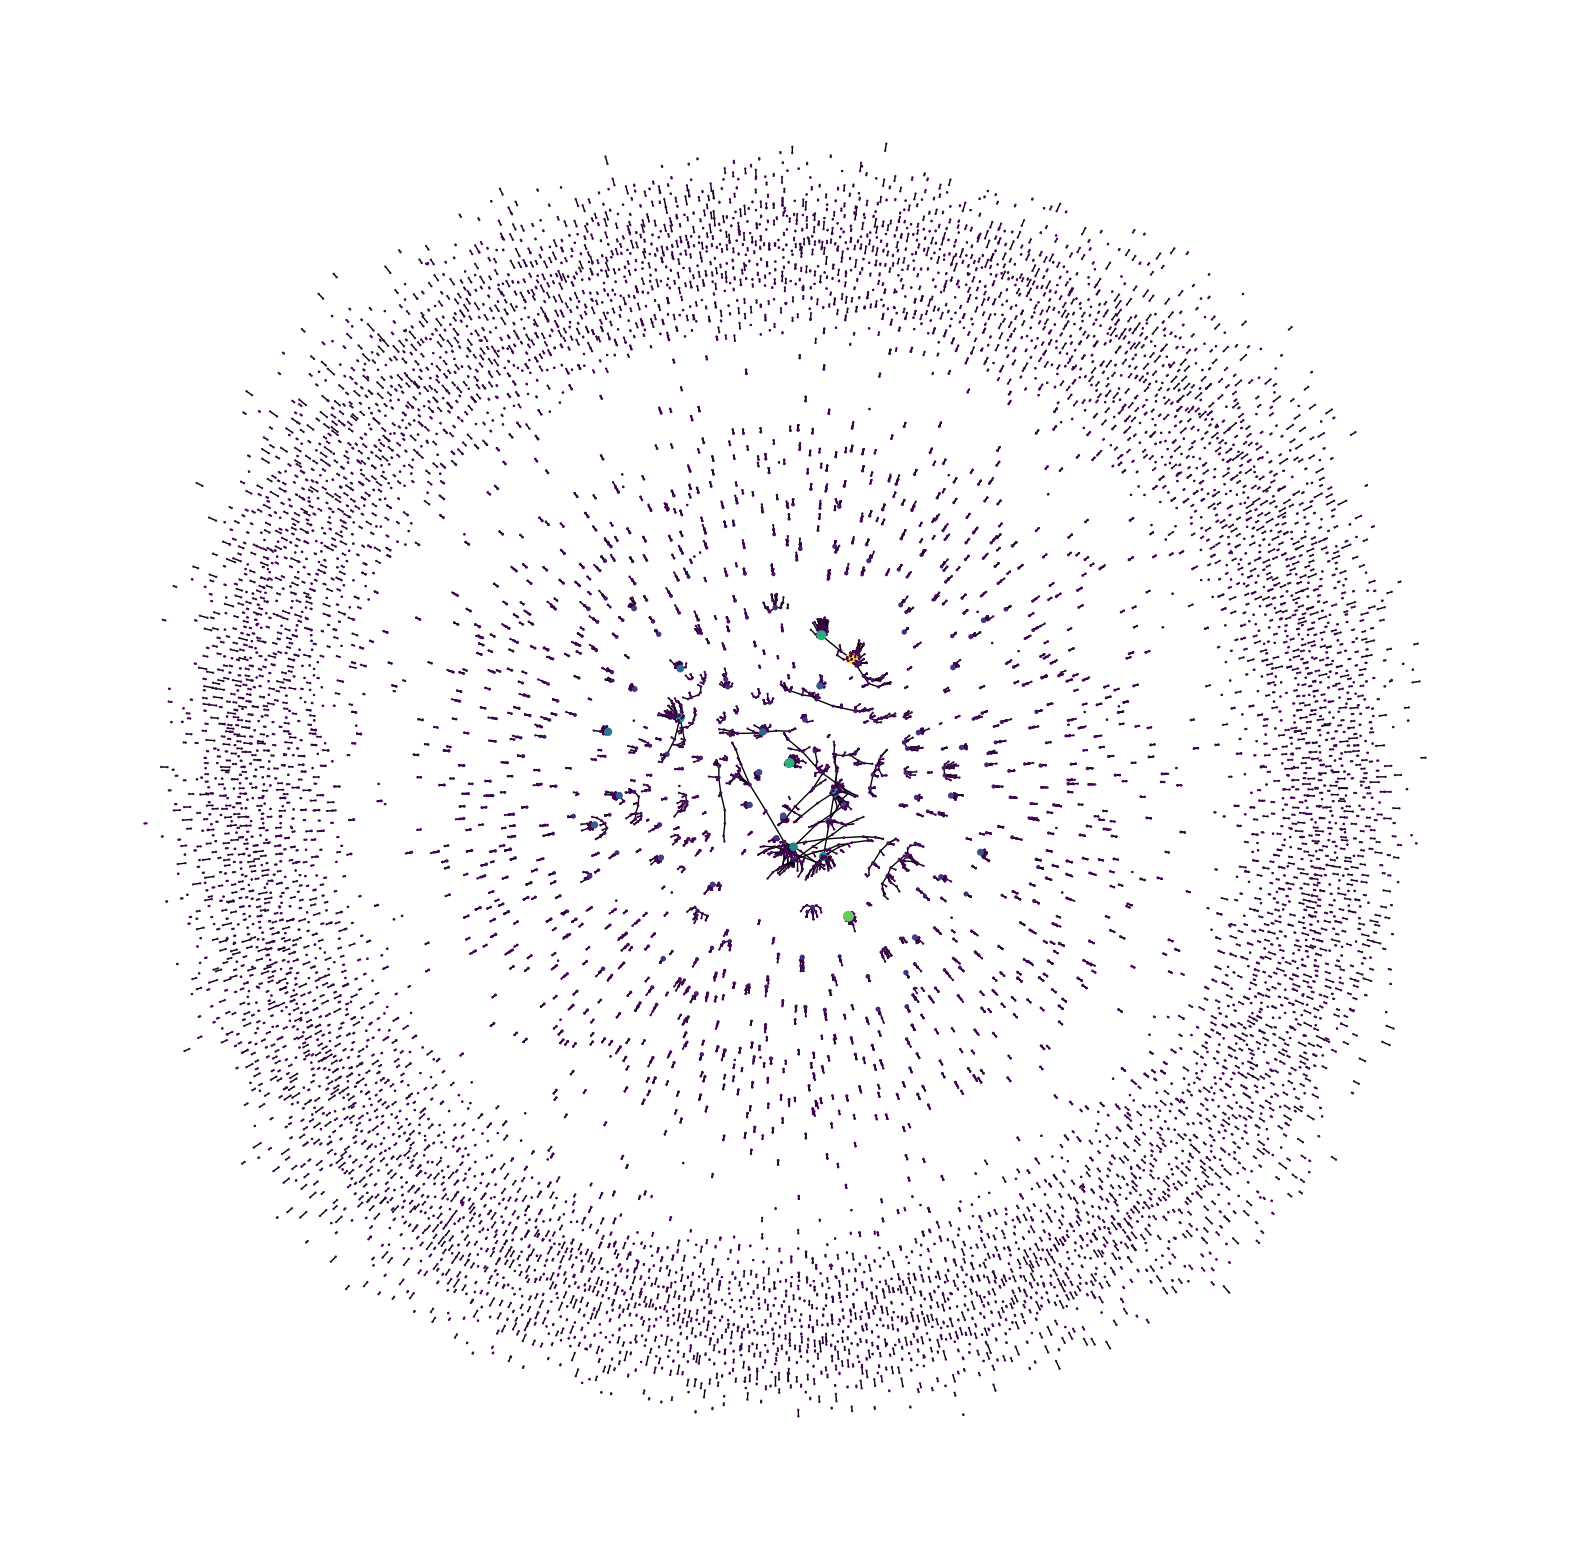

In [24]:
pos = nx.spring_layout(graph)
node_color = [20000.0 * graph.degree(v) for v in graph]
node_size =  [v * 10000 for v in degree_centralities.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)

plt.axis('off')

# Closeness and Communities 

We can think of communities as groups of nodes that are more densely connected within themselves compared to connections with nodes outside the group. Communities capture the idea of cohesive subgroups or modules within a network, where nodes within the same community have stronger connections to each other. 

While closeness centrality measures **individual** node importance and information flow efficiency, communities capture *cohesive subgroups* with dense connections. Together, they contribute to understading the dynamics of information flow and the origanization of the network.

### Closeness centrality within communities

Nodes that belong to the same community often have higher closeness centrality values within the community. This is because they are more closely connected to each other and can reach each other more quickly.

### Bridging Communities with Closeness Centrality

Nodes that connect different communities or act as **bridges** between communities often have higher closeness centrality values. This is because they are able to reach different communities more quickly and efficiently. These nodes play a crucial role in connecting separate communities and facilitating information flow between them.

### Community-level analysis using Closeness Centrality

Closeness centrality can also be used at the community level to analyze the importance of communities within the network. By aggregating closeness centrality values of nodes within a community, we can assess the overall efficiency of information flow within the community. This can help identify key communities that play a significant role in the network.